In [4]:
%pylab
%matplotlib inline

params = {'text.usetex' : True,
          'font.size' : 8,
          'font.family' : 'lmodern',
          'text.latex.unicode' : True}
plt.rcParams.update(params)

fig_width = 5.33 # Standard figure with for J. Fluid Mech.

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


This Jupyter Notebook aims at illustrating the different concepts seen during the Master 2 course *Nonlinear physics, dynamical systems and chaos theory* at Ecole Nationale Supérieure d'Arts et Métiers (2017-2018). Its uses *Python 2.7*, a high-level programming language which becomes increasingly popular in Science. If you do not already have Python 2.7 installed on your computer, I strongly recommend you to download the Anaconda Distribution from :

- https://anaconda.org/

This Python 2.7 distribution is available for Windows, Mac and Linux and contains all of the python package you will need for this course. If you are not familiar with Python, a number of tutorials are available online. Moreover, the list below provides link to the documentation of the major packages we will be using during the course:

- [NumPy](http://www.numpy.org/) : It is the fundamental package for scientific computing with Python.
- [SciPy](https://www.scipy.org/) : The SciPy ecosystem is a collection of open source software for scientific computing in Python. This package, build on NumPy, we will provide you with pretty anything you'll need in this course.
- [matplotlib](https://matplotlib.org/) : It is a Python 2D plotting library which produces publication quality figures.

If you have any question about the course, please feel free to email me at :

- jean-christophe.loiseau@ensam.eu

# Second-order dynamical systems

We will consider the same second-order dynamical system as during the course. This system reads
$$
\begin{aligned}
    \dot{x} & = x - y^2 + 1.28 + 1.4xy \\
    \dot{y} & = 0.2y - x + x^3.
\end{aligned}
$$

As explained during the course, this system is considered solely for illustration purposes. To the best of my knowledge, it does not model any particular physics. The following jupyter cells illustrate how to define this system in python as well as how to draw its phase plane.

In [2]:
##### Define the dynamical system considered.

def dynamical_system(x, t=None):
    # --> Initialize variable.
    dx = np.zeros_like(x)
    
    # --> x-equation.
    dx[0] = x[0] - x[1]**2 + 1.28 + 1.4*x[0]*x[1]
    
    # --> y-equation.
    dx[1] = 0.2*x[1] - x[0] + x[0]**3.
    
    return dx

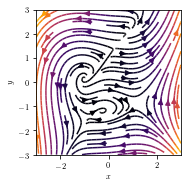

In [12]:
##### Draw the phase plane.

# --> Define the mesh of the plane.
x = np.linspace(-3, 3)
x, y = np.meshgrid(x, x)

# --> Compute xdot and ydot at each grid point.
xdot, ydot = np.zeros_like(x), np.zeros_like(y)
xdot[:], ydot[:] = dynamical_system([x[:], y[:]])

# --> Setup the figure.
fig = plt.figure(figsize=(fig_width/2, fig_width/2))
ax = fig.gca()

# --> Plot streamlines.
magnitude = np.sqrt(xdot**2 + ydot**2)
ax.streamplot(x, y, xdot, ydot, 
              color=magnitude, 
              cmap=plt.cm.inferno, 
              density=1)

# --> Make the figure pretty.
ax.set_aspect('equal')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

As can be seen, drawing the phase plane of a second-order dynamical system is quite straightforward, requiring only a few lines of codes, while providing numerous insights into the dynamics of the system. In the present case, it is obvious that a number of peculiar points in this phase plane seem to structure the different trajectories. These peculiar points, known as fixed points, can easily be pinpointed by *isoclines*. For a second-order dynamical system, isoclines are defined as lines along which
$$
    \dot{x} = 0 \text{ or } \dot{y} = 0.
$$

Fixed points, for which $\dot{x} = \dot{y} = 0$ are thus identified as the intersections of these isoclines.

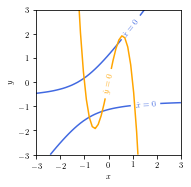

In [25]:
##### Draw isoclines.

# --> Setup the figure.
fig = plt.figure(figsize=(fig_width/2, fig_width/2))
ax = fig.gca()

# --> Plot the isoclines.
c1 = ax.contour(x, y, xdot, levels=[0.], colors='royalblue')
c2 = ax.contour(x, y, ydot, levels=[0.], colors='orange')

# --> Add the labels onto the lines.
fmt = {}
strs = [r'$\dot{x}=0$']
for l, s in zip(c1.levels, strs):
    fmt[l] = s
ax.clabel(c1, c1.levels, inline=True, fmt=fmt, fontsize=8)

fmt = {}
strs = [r'$\dot{y}=0$']
for l, s in zip(c2.levels, strs):
    fmt[l] = s
ax.clabel(c2, c2.levels, inline=True, fmt=fmt, fontsize=8)

# --> Make the figure pretty.
ax.set_aspect('equal')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')


As shown, the $\dot{x}=0$ isocline (blue) and the $\dot{y}=0$ isocline (orange) intersect six times. As a consequence, the dynamical system considered admits six different fixed points. Let us now try to calculate these different fixed points.

## How to compute fixed points?

In [32]:
##### Define the Jacobian matrix of the system.

def jacobian(x):
    # --> Initialize variable.
    J = np.zeros((x.shape[0], x.shape[0]))
    
    # --> Fill-in the Jacobian matrix.
    J[0, 0] = 1. + 1.4*x[1]
    J[0, 1] = -2.*x[1] + 1.4*x[0]
    
    J[1, 0] = -1. + 3.*x[0]**2
    J[1, 1] = 0.2
    
    return J

In [33]:
##### Newton-Raphson method.

from scipy.linalg import solve, norm

def Newton_Raphson(x, func, jac, tol=1e-10, nmax=100):
    
    residual = 1.
    n = 0
    
    while (residual > tol) and (n < nmax):
        # --> Evaluate function.
        f = func(x)
        # --> Evaluate Jacobian.
        J = jacobian(x)
        # --> Solve the linear system.
        d = solve(J, -f)
        # --> Update the solution.
        x += d
        # --> Compute residual.
        residual = norm(d, ord=2)
        
    return x

For the initial condition x0 = (-0.80, -1.45), the fixed point computed is given by (-0.80, -1.45).


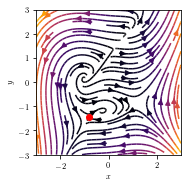

In [40]:
# --> Define the initial guess.
x0 = np.array([0., 0.])

# --> Run the Newton-Raphson algorithm.
fixed_point = Newton_Raphson(x0, dynamical_system, jacobian)

print 'For the initial condition x0 = (%.2f, %.2f), the fixed point computed is given by (%.2f, %.2f).' %(x0[0], x0[1], fixed_point[0], fixed_point[1])



################################################################
##### Draws the phase plane again and add the fixed point. #####
################################################################

# --> Define the mesh of the plane.
x = np.linspace(-3, 3)
x, y = np.meshgrid(x, x)

# --> Compute xdot and ydot at each grid point.
xdot, ydot = np.zeros_like(x), np.zeros_like(y)
xdot[:], ydot[:] = dynamical_system([x[:], y[:]])

# --> Setup the figure.
fig = plt.figure(figsize=(fig_width/2, fig_width/2))
ax = fig.gca()

# --> Plot streamlines.
magnitude = np.sqrt(xdot**2 + ydot**2)
ax.streamplot(x, y, xdot, ydot, 
              color=magnitude, 
              cmap=plt.cm.inferno, 
              density=1)

# --> Add the fixed point just computed.
ax.plot(fixed_point[0], fixed_point[1], 'ro')

# --> Make the figure pretty.
ax.set_aspect('equal')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

## Determining the type of fixed point and its linear stability

In [49]:
# --> Evaluate the Jacobian matrix for the fixed point computed before.
A = jacobian(fixed_point)

print 'The Jacobian matrix of the fixed point considered is given by'
print A, '\n'

# --> Evaluate its eigenvalues.
from scipy.linalg import eig
eigenvalues, eigenvectors = eig(A)

print 'Its eigenvalues are given by'
print 'lambda_1 =', eigenvalues[0], ' and lambda_2 =', eigenvalues[1]

The Jacobian matrix of the fixed point considered is given by
[[-1.02947599  1.78219713]
 [ 0.90991368  0.2       ]] 

Its eigenvalues are given by
lambda_1 = (-1.82879186442+0j)  and lambda_2 = (0.999315876383+0j)
